You are working as a Data Scientist in EGIER, an outdoor equipment manufacturer in Bandung. As a Data Scientist, you have been tasked with processing some data on EGIER warehouse capacity. You are given a set of data that consist of the monthly production of a certain type of bag they produced. The data span from January 2018 to December 2023 is given as M1 to M144. Your supervisor has given you a series of task that needs to be done on the data, as a part or your job.

In [31]:
#Library
import numpy as np
import matplotlib.pyplot as plt
import math as math

Problem 1 (LO2 30 points)

Find the trend on the bag’s production from the data. You must provide a mathematical model that can explain the production’s trend accurately. Since your supervisor want an accurate model, you must avoid any linear approach to build the trend model.

In [32]:
# Data set of Production
x = np.arange(1, 145)

y = np.array([
    1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399, 
    2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862, 
    3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531, 
    3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422, 
    4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211, 
    4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235, 
    6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594, 
    7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933, 
    8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048, 
    10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123, 
    12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162, 
    13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893, 
    16388, 16782, 16716, 17033, 16896, 17689
])

In [33]:
#Interpolation Newton Polynomial
def NDD(x,y):
    n = len(x)
    A = np.zeros((n,n+1))
    A[:,0]= x[:]
    A[:,1]= y[:]
    for j in range(2,n+1):
        for i in range(j-1,n):
            A[i,j] = (A[i,j-1]-A[i-1,j-1]) / (A[i,0]-A[i-j+1,0])
    p = np.zeros(n)
    for k in range(0,n):
        p[k] = A[k,k+1]
    return p

def poly(t,x,p):
    n = len(x)
    out = p[n-1]
    for i in range(n-2,-1,-1):
        out = out*(t-x[i]) + p[i]
    return out

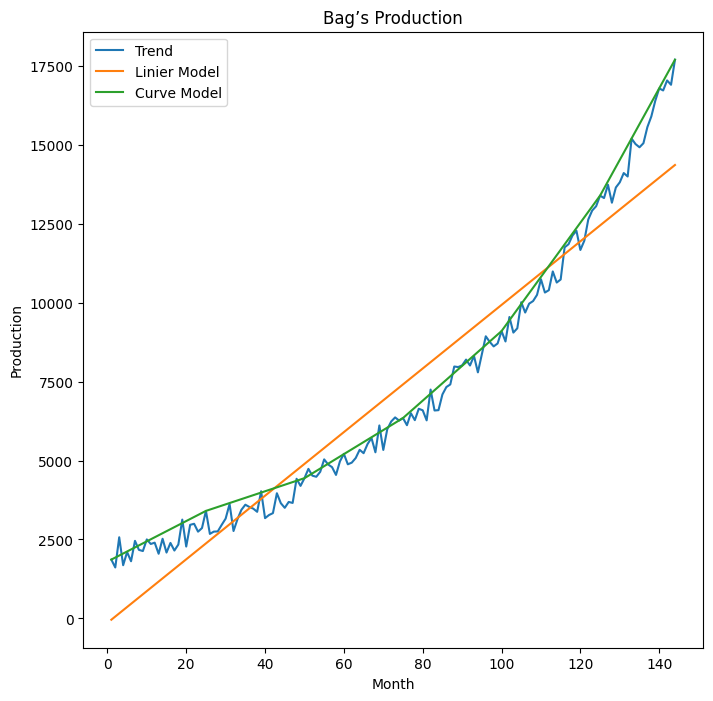

In [34]:
# sample data for interpolation
xs =([1 , 25, 50, 75, 100, 125, 144])
ys = ([1863, 3405, 4441, 6345, 9098, 13387, 17689])

#interpolation
a = NDD(x,y)
tval = np. linspace(min(xs)-1,max(ys)+1,100)
yval = poly(tval,xs,a)

#curve fitting using least square
A = np.vstack([x, np.ones(len(x))]).T
y = y[:, np.newaxis]
m, b = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)

plt.figure(figsize=(8, 8))
plt.title('Bag’s Production')
plt.plot(x,y, '-')
plt.plot(x, m*x +b)
plt.plot(xs,ys)
plt.xlabel('Month')
plt.ylabel('Production')
plt.legend(['Trend', 'Linier Model', 'Curve Model'])
plt.show()

Problem 2 : (LO3 25 points)

Since you’ll need to process the data using a computer program, you’ll need to convert the mathematical model from problem #1 to its numerical form (approximation). This is done so that the mathematical model can be calculated by the program easily. Since accuracy is still important, make sure that your conversion is accurate as possible. Provide an explanation to your supervisor about the accuracy of your conversion. The class topic for this question is Introduction to Taylor Series.

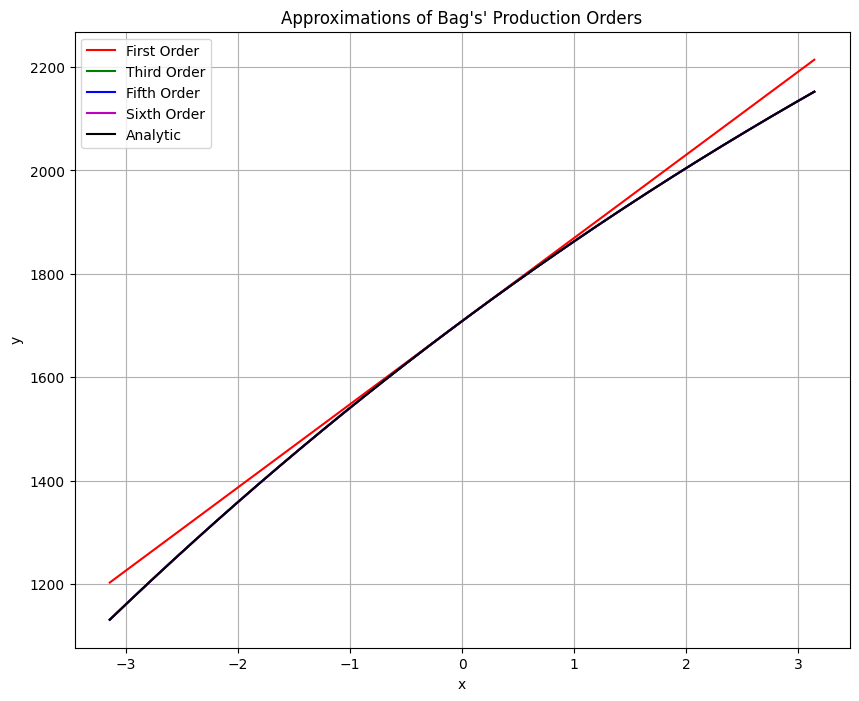

In [35]:
# taylor Series
#define the fuction and its derrevative
def f(x):
    return ((-230599132071467*x**6)/10418140594348987500000 + 
            (151073199282433*x**5)/14777504389147500000 - 
            (18977997563014754123*x**4)/10418140594348987500000 + 
            (7451760605528754007*x**3)/46302847085995500000 - 
            (56314281669026490553*x**2)/8334512475479190000 + 
            446927219321466859*x/2778170825159730 + 
            52745937577742989/30868564723997)
    
def f_prime(x):
    return ((-230599132071467*6*x**5)/10418140594348987500000 + 
            (151073199282433*5*x**4)/14777504389147500000 - 
            (18977997563014754123*4*x**3)/10418140594348987500000 + 
            (7451760605528754007*3*x**2)/46302847085995500000 - 
            (56314281669026490553*2*x)/8334512475479190000 + 
            446927219321466859/2778170825159730)

def f_double_prime(x):
    return ((-230599132071467*6*5*x**4)/10418140594348987500000 + 
            (151073199282433*5*4*x**3)/14777504389147500000 - 
            (18977997563014754123*4*3*x**2)/10418140594348987500000 + 
            (7451760605528754007*3*2*x)/46302847085995500000 - 
            (56314281669026490553*2)/8334512475479190000)

def f_triple_prime(x):
    return ((-230599132071467*6*5*4*x**3)/10418140594348987500000 + 
            (151073199282433*5*4*3*x**2)/14777504389147500000 - 
            (18977997563014754123*4*3*2*x)/10418140594348987500000 + 
            (7451760605528754007*3*2)/46302847085995500000)

def f_fourth_prime(x):
    return ((-230599132071467*6*5*4*3*x**2)/10418140594348987500000 + 
            (151073199282433*5*4*3*2*x)/14777504389147500000 - 
            (18977997563014754123*4*3*2)/10418140594348987500000)

def f_fifth_prime(x):
    return ((-230599132071467*6*5*4*3*2*x)/10418140594348987500000 + 
            (151073199282433*5*4*3*2)/14777504389147500000)

def f_sixth_prime(x):
    return (-230599132071467*6*5*4*3*2)/10418140594348987500000

#taylor series method
def taylor_series(x, x0, order):
    series = f(x0)
    if order >= 1:
        series += f_prime(x0) * (x - x0)
    if order >= 2:
        series += f_double_prime(x0) * (x - x0)**2 / math.factorial(2)
    if order >= 3:
        series += f_triple_prime(x0) * (x - x0)**3 / math.factorial(3)
    if order >= 4:
        series += f_fourth_prime(x0) * (x - x0)**4 / math.factorial(4)
    if order >= 5:
        series += f_fifth_prime(x0) * (x - x0)**5 / math.factorial(5)
    if order >= 6:
        series += f_sixth_prime(x0) * (x - x0)**6 / math.factorial(6)
    return series

x_vals = np.linspace(-np.pi, np.pi, 200) #input nilai x
y_vals = [f(val) for val in x_vals]

plt.figure(figsize=(10, 8))
labels = ['First Order', 'Third Order', 'Fifth Order', 'Sixth Order']
colors = ['r', 'g', 'b', 'm']

for order, label, color in zip(range(1, 8, 2), labels, colors):
    y_taylor = [taylor_series(val, 0, order) for val in x_vals]
    plt.plot(x_vals, y_taylor, label=label, color=color)

plt.plot(x_vals, y_vals, 'k', label='Analytic')
plt.grid()
plt.title('Approximations of Bag\'s\' Production Orders')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



Problem 3: (LO3 25 points)

The warehouse was designed to be able to store a maximum of 25,000 (twenty five thousands) bags at each month. Your supervisor asked you to provide a prediction when do EGIER need to build a new warehouse based on the trend that you have acquired in problem #2. To build a new warehouse, it is predicted that they need at least 13 months. So provide the time when EGIER need to start building their new warehouse. (Hint: this can be approached as a root of equation problem)

In [36]:
# newton Raphson method
def g(x):
    return ((-230599132071467*x**6)/10418140594348987500000 + 
            (151073199282433*x**5)/14777504389147500000 - 
            (18977997563014754123*x**4)/10418140594348987500000 + 
            (7451760605528754007*x**3)/46302847085995500000 - 
            (56314281669026490553*x**2)/8334512475479190000 + 
            446927219321466859*x/2778170825159730 + 
            52745937577742989/30868564723997 - 25000)

def dg(x):
    return ((-1383594792428802*x**5)/10418140594348987500000 + 
            (755365996412165*x**4)/14777504389147500000 - 
            (7591199025218369652*x**3)/10418140594348987500000 + 
            (22355281816586262021*x**2)/46302847085995500000 - 
            (112628563338052981106*x)/8334512475479190000 + 
            446927219321466859/2778170825159730)

def newton_raphson(f, df, x, tol=0.001, max_iter=100, iter=0):
    x1 = x - (f(x) / df(x))
    
    if np.abs(f(x1)) < tol or iter >= max_iter:
        return x1
    
    return newton_raphson(f, df, x1, tol, max_iter, iter+1)

x0 = 1 #input

start_building_month = newton_raphson(g, dg, x0)

# Print the result
print(f"EGIER needs to start building their new warehouse around {start_building_month:.3f} months.")


EGIER needs to start building their new warehouse around 172.923 months.
